<a href="https://colab.research.google.com/github/Daviunb6202/Projetos-CIS-UnB/blob/main/CIS%20Projeto%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise:

## O que foi feito:

Os arquivos de imagens foram organizados em pastas de treino, validação e teste por meio do gerador ImageDataGenerator, utilizando do método flow_from_directory() e outras bibliotecas como glob, os e shutil. As imagens foram divididas em 10 batches, com 500 imagens para treino, 100 para validação e 50 para teste, ou seja, não foi sua capacidade máxima. Além disso, todas passaram por um pré-processamento, que transforma a coloração de RGB para GBR, usada no modelo VGGNet16. 

A minha proposta foi utilizar um modelo sequencial CNN mais simples para uma primeira avaliação, e após, utilizar o mesmo modelo com uma nova ativação elu, métodos de regularização(L2), normalização e otimização(Nadam). 

Vale ressaltar que tentei utilizar de diversos Learning Rates Schedulers, mas sem muito sucesso em seu funcionamento. Quando utilizados, havia uma variação de perda ao redor de um certo valor ao longo das vinte épocas, ao invés de diminuir linearmente.

Para fim de conparação, importei também um modelo VGGnet16, via transfer learning, com apenas a camada de output modificada, com um pooling extra no final.

Por fim, os resultados do modelo CNN melhorado e do VGGNet16 adaptado foram comparados por matriz de confusão e relatório de acurácia, precisão e recall.

-----------------------------------------------------

## Resultados:

Vemos que o modelo mais simples teve um bom resultado no treino, mas não na validação, configurando assim, um caso de 'overfitting'. Após usar o método de regularização l2(suaviação da atualização dos pesos), somados às outras funcionalidades já mencionadas, o resultado no pacote de validação foi melhor quase 40%, embora, para minha surpresa, o desempenho do treino decaiu um por volta de 10%. 

Já o modelo VGGNet16 adaptado performou muito bem, como já esperava de um modelo feito para executar uma tarefa tão parecida, bastando reduzir o número de classes para se trabalhar. Vale mencionar que rodei um modelo Xception e os resultados foram bastante fracos, com 50% de acurácia no treino e validação('underfitting'?), o que me impressionou, apesar de não saber dizer exatamente o porquê. Por último, também me ocorreu que, caso descongelasse as camadas deste modelo, a função d ecusto começaria a retornar NaNs, provavelmente configurando um caso de gradientes que 'explodiram.

In [1]:
 from google.colab import drive

In [2]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 12.5 MB/s 


In [2]:
!cp '/content/drive/MyDrive/animals.zip' new

In [3]:
!unzip new

Archive:  new
  inflating: animals/cats/cats_00001.jpg  
  inflating: animals/cats/cats_00002.jpg  
replace animals/cats/cats_00003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
  inflating: animals/cats/cats_00004.jpg  
  inflating: animals/cats/cats_00005.jpg  
  inflating: animals/cats/cats_00006.jpg  
  inflating: animals/cats/cats_00007.jpg  
  inflating: animals/cats/cats_00008.jpg  
  inflating: animals/cats/cats_00014.jpg  
  inflating: animals/cats/cats_00016.jpg  
  inflating: animals/cats/cats_00017.jpg  
  inflating: animals/cats/cats_00019.jpg  
  inflating: animals/cats/cats_00020.jpg  
  inflating: animals/cats/cats_00021.jpg  
  inflating: animals/cats/cats_00023.jpg  
  inflating: animals/cats/cats_00024.jpg  
  inflating: animals/cats/cats_00025.jpg  
  inflating: animals/cats/cats_00026.jpg  
  inflating: animals/cats/cats_00029.jpg  
  inflating: animals/cats/cats_00030.jpg  
  inflating: animals/cats/cats_00031.jpg  
  inflating: animals/cats/cats_00032.jpg  
  infl

In [4]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk 
import tensorflow as tf
from tensorflow import keras
import shutil 
import glob
import random
import warnings 
import itertools 

## Organização dos arquivos

In [5]:
#Conferir numero de imagens
list = os.listdir('/content/animals/cats') 
number_files = len(list)
print(number_files)

1000


In [6]:
#Conferir numero de imagens
list = os.listdir('/content/animals/dogs') 
number_files = len(list)
print(number_files)

1000


In [7]:
#Conferir numero de imagens
list = os.listdir('/content/animals/panda') 
number_files = len(list)
print(number_files)

1000


In [8]:
#move para o diretorio das fotos
os.chdir('/content/animals')

#não tendo uma pasta organizada de treino, agora são criadas - treino validade e teste para cachorro gato panda
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dogs')
  os.makedirs('train/cats')
  os.makedirs('train/panda')
  os.makedirs('valid/dogs')
  os.makedirs('valid/cats')
  os.makedirs('valid/panda')
  os.makedirs('test/dogs')
  os.makedirs('test/cats')
  os.makedirs('test/panda')
   
  #são sorteadas 500 imagens das 100  para o treino, 100, para validade e 50 para o teste
  for c in random.sample(glob.glob('/content/animals/cats/*'), 600):
    shutil.move(c, 'train/cats')
  for c in random.sample(glob.glob('/content/animals/dogs/*'), 600):
    shutil.move(c, 'train/dogs')
  for c in random.sample(glob.glob('/content/animals/panda/*'), 600):
    shutil.move(c, 'train/panda')
  for c in random.sample(glob.glob('/content/animals/cats/*'), 250):
    shutil.move(c, 'valid/cats')
  for c in random.sample(glob.glob('/content/animals/dogs/*'), 250):
    shutil.move(c, 'valid/dogs')
  for c in random.sample(glob.glob('/content/animals/panda/*'), 250):
    shutil.move(c, 'valid/panda')
  for c in random.sample(glob.glob('/content/animals/cats/*'), 150):
    shutil.move(c, 'test/cats')
  for c in random.sample(glob.glob('/content/animals/dogs/*'), 150):
    shutil.move(c, 'test/dogs')
  for c in random.sample(glob.glob('/content/animals/panda/*'), 150):
    shutil.move(c, 'test/panda')

#Volta para o diretorio principal
os.chdir('../../')

In [32]:
#Deletando  com todas as suas fotos dentro para poder refazer o train test split 

#os.walk mostra os endereços , diretórios e arquivos que se proliferam de tal endereço colocado
for d in glob.glob('/content/animals/train/*'):   #para cada um : gato cachorro e panda
  path = os.path.join('/content/animals/train', d)      #cria um caminho pra cada um deles
  for dirpath, dirnames, filenames in os.walk(path): #e pra cada um deles percorre todos os arquivos
    for c in filenames:        
     c = os.path.join(path, c) #constroi o endereço do arquivo
     os.remove(c)     #deleta a imagem
  os.rmdir(path)      #deleta as pastas das imagens 

for d in glob.glob('/content/animals/valid/*'): 
  path = os.path.join('/content/animals/valid', d) 
  for dirpath, dirnames, filenames in os.walk(path):  
    for c in filenames:         
     c = os.path.join(path, c)     
     os.remove(c)   
  os.rmdir(path)    

for d in glob.glob('/content/animals/test/*'):
  path = os.path.join('/content/animals/test', d)
  for dirpath, dirnames, filenames in os.walk(path): 
    for c in filenames:
     c = os.path.join(path, c) 
     os.remove(c) 
  os.rmdir(path)

In [12]:
train_path = '/content/animals/train'
valid_path = '/content/animals/valid'
test_path = '/content/animals/test'

In [13]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image data generator vai produzir os batches de imagens(em tensor) e suas labels 
#preprocessing usado para o VGGNet16 que transforma RGB em BGR e põe os canais ded cor em uma escala especifica
#target_size são os pixels da imagem 
#o gerador manda batches de 10 em 10 imagesn 
train_batches = ImageDataGenerator(preprocessing_function = tensorflow.keras.applications.vgg16.preprocess_input)  
train_batches = train_batches.flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs', 'panda'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function = tensorflow.keras.applications.vgg16.preprocess_input)  
valid_batches = valid_batches.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cats', 'dogs', 'panda'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function = tensorflow.keras.applications.vgg16.preprocess_input)  
test_batches = test_batches.flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs', 'panda'], batch_size=10, shuffle=False)
  

Found 1800 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Found 450 images belonging to 3 classes.


In [14]:
#assegurar do tamanho de cada batch e número de classes
assert train_batches.n == 1800
assert valid_batches.n == 750
assert test_batches.n == 450
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 3

In [15]:
#Por ImageDataGenerator ser um gerador, cada batch é uma instancia chamada pelo batch 
train, train_lab = next(train_batches)
valid, valid_lab = next(valid_batches)
test, test_lab = next(test_batches)

#cada batch reduzido na forma de imput correta e dividindo por 255 para colocar cada pixel em uma escala de 0 a 1 
train = train 
valid = valid 
test = test 

In [15]:
#Função para plotar imagem
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
      ax.imshow(img)
      ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

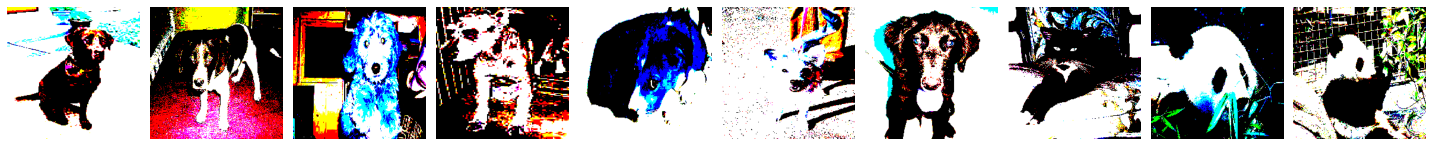

(10, 224, 224, 3)


In [10]:
plotImages(train)
print(train.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

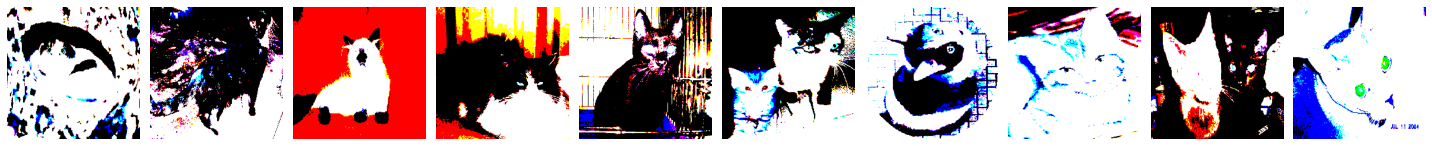

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [11]:

test_imgs, text_labels = next(test_batches)
plotImages(test_imgs)
print(text_labels)

## CNN sem métodos de melhora de performance

In [16]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
model = keras.models.Sequential([
Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', #32 filtros 3x3
input_shape=(224, 224, 3)),
MaxPool2D(pool_size=(2,2), strides=2), #valores mais expressivos filtrados são selecionados 
Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
MaxPool2D(pool_size=(2,2), strides=2),
Flatten(), #deixar um vetor em uma dimensão para processar como input de DNN 
Dense(units=3, activation='softmax')])

In [17]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(train_batches, epochs=30,validation_data=valid_batches)

Epoch 1/30
180/180 [==============================] - 27s 96ms/step - loss: 19.9341 - accuracy: 0.5228 - val_loss: 5.9843 - val_accuracy: 0.5840
Epoch 2/30
180/180 [==============================] - 16s 88ms/step - loss: 1.1518 - accuracy: 0.7917 - val_loss: 2.8807 - val_accuracy: 0.5973
Epoch 3/30
180/180 [==============================] - 15s 86ms/step - loss: 0.2844 - accuracy: 0.9183 - val_loss: 2.4613 - val_accuracy: 0.6187
Epoch 4/30
180/180 [==============================] - 15s 86ms/step - loss: 0.0812 - accuracy: 0.9722 - val_loss: 2.4204 - val_accuracy: 0.6093
Epoch 5/30
180/180 [==============================] - 16s 88ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 2.5253 - val_accuracy: 0.6200
Epoch 6/30
180/180 [==============================] - 16s 88ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.3533 - val_accuracy: 0.6227
Epoch 7/30
180/180 [==============================] - 16s 89ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.3210 - val_accuracy

In [19]:
model.save('Modelo_simples.h5') 

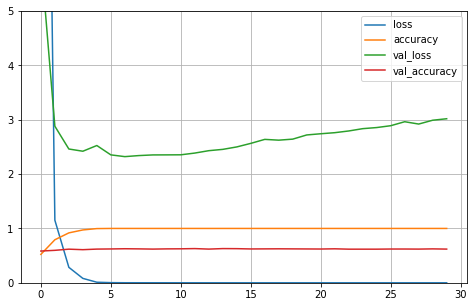

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) 
plt.show()

## CNN com métodos de melhora de performance

In [21]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2 


#eu utilizei esse formato de 'model.add', pois foi a única forma que encontrei para aplicar BatchNormalization
model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=(224, 224, 3),
                 kernel_regularizer=L2(1e-4)))
model.add(tf.keras.layers.BatchNormalization())         #normalização é recomendada vir antes da ativação 
model.add(tf.keras.layers.Activation('elu')) 
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2)) #stride maior que um para reduzir um pouco a quantidade de informação 
model.add(keras.layers.Dropout(0.1))       
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same',
                 kernel_regularizer=L2(1e-4))) 
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('elu')) 
model.add(MaxPool2D(pool_size=(2,2), strides=2)) 
model.add(keras.layers.Dropout(0.1))       
model.add(Flatten())
model.add(keras.layers.Dense(64, kernel_regularizer=L2(1e-4)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('elu')) 
model.add(keras.layers.Dropout(0.1))           #é recomendado colocar o dropout depois da ativação 
model.add(Dense(units=3, activation='softmax'))

In [22]:
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers.schedules import ExponentialDecay 

#Learning rate scheduler que não funcionou bem
#initial_learning_rate = 0.1
#lr_schedule = ExponentialDecay(
#    initial_learning_rate,
#    decay_steps=100000, decay_rate=0.96, staircase=True)




model.compile(optimizer=Nadam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 

#Este callback vai diminuindo a learning rate pelo fator escolhido a cada número escolhido de épochas
#até chegar ao mínimo(no caso 0.001), conforme monitora falta de redução no custo da validação
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=4, min_lr=0.001)

history = model.fit(train_batches, epochs=30,validation_data=valid_batches, callbacks=[reduce_lr])

Epoch 1/30
180/180 [==============================] - 21s 97ms/step - loss: 1.4553 - accuracy: 0.5706 - val_loss: 1.9384 - val_accuracy: 0.4880 - lr: 0.0100
Epoch 2/30
180/180 [==============================] - 17s 95ms/step - loss: 1.1255 - accuracy: 0.6050 - val_loss: 1.2947 - val_accuracy: 0.5587 - lr: 0.0100
Epoch 3/30
180/180 [==============================] - 17s 94ms/step - loss: 0.9991 - accuracy: 0.6278 - val_loss: 0.9497 - val_accuracy: 0.6147 - lr: 0.0100
Epoch 4/30
180/180 [==============================] - 17s 94ms/step - loss: 0.9276 - accuracy: 0.6439 - val_loss: 1.0083 - val_accuracy: 0.5920 - lr: 0.0100
Epoch 5/30
180/180 [==============================] - 17s 95ms/step - loss: 0.8903 - accuracy: 0.6583 - val_loss: 0.9851 - val_accuracy: 0.5920 - lr: 0.0100
Epoch 6/30
180/180 [==============================] - 17s 95ms/step - loss: 0.8735 - accuracy: 0.6606 - val_loss: 0.9579 - val_accuracy: 0.6040 - lr: 0.0100
Epoch 7/30
180/180 [==============================] - 17s 

In [45]:
predictions = model.predict(x=test_batches)

In [25]:
model.save('Modelo_melhorado.h5') 

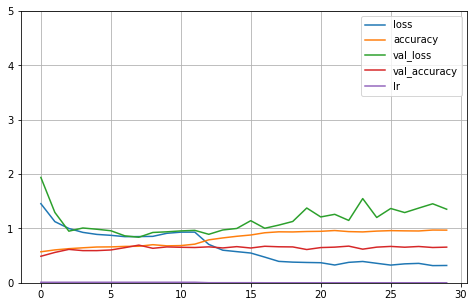

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True) 
plt.gca().set_ylim(0, 5) 
plt.show()

## CNN via Transfer Learning de VGGNet16


In [32]:
#Para realizar o transfer learning, é necessário construir o modelo no formato funcional
#é acrescentado no topo do modelo um average pooling e novo output que ainda precisam ser treinados 

base_model = keras.applications.VGG16(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(3, activation="softmax")(avg)
model_transfer = keras.Model(inputs=base_model.input, outputs=output)

In [33]:
from tensorflow.keras.callbacks import ReduceLROnPlateau 
from tensorflow.keras.callbacks import EarlyStopping 

for layer in base_model.layers: #congelar camadas e treinar apenas output+pooling
  layer.trainable = False

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=4, min_lr=0.001)

#este callback permite encerrar o fit no momento que a métrica observada não tiver melhoras
#segundo o número de épocas escolhidas (patience)
early_stopping_cb = EarlyStopping(monitor='loss', min_delta= 0.01,
                                  patience=3, restore_best_weights=True) 


optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.01)  
model_transfer.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history_transfer = model_transfer.fit(train_batches, epochs=30, validation_data=valid_batches, callbacks = [reduce_lr, early_stopping_cb])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


180/180 [==============================] - 35s 190ms/step - loss: 2.0139 - accuracy: 0.9611 - val_loss: 0.6947 - val_accuracy: 0.9813 - lr: 0.0100
Epoch 2/30
180/180 [==============================] - 34s 186ms/step - loss: 0.5576 - accuracy: 0.9856 - val_loss: 0.4034 - val_accuracy: 0.9867 - lr: 0.0100
Epoch 3/30
180/180 [==============================] - 34s 188ms/step - loss: 0.2361 - accuracy: 0.9928 - val_loss: 0.3942 - val_accuracy: 0.9853 - lr: 0.0100
Epoch 4/30
180/180 [==============================] - 34s 186ms/step - loss: 0.1850 - accuracy: 0.9956 - val_loss: 0.4135 - val_accuracy: 0.9813 - lr: 0.0100
Epoch 5/30
180/180 [==============================] - 33s 186ms/step - loss: 0.1461 - accuracy: 0.9967 - val_loss: 0.4383 - val_accuracy: 0.9840 - lr: 0.0100
Epoch 6/30
180/180 [==============================] - 34s 187ms/step - loss: 0.1243 - accuracy: 0.9978 - val_loss: 0.4357 - val_accuracy: 0.9840 - lr: 0.0100
Epoch 7/30
180/180 [==============================] - 33s 186ms

In [43]:
predictions_transfer = model.predict(x=test_batches)

In [35]:
model_transfer.save('Modelo_transfer_learning.h5') 

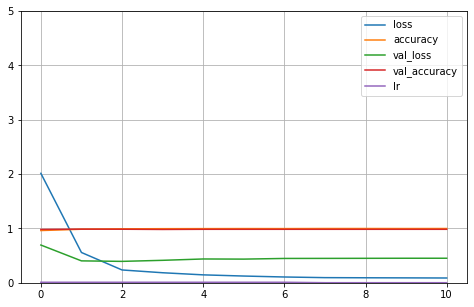

In [36]:
pd.DataFrame(history_transfer.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5) 
plt.show()

## Fazendo matriz de confusão dos resultados e predições do modelo próprio


              precision    recall  f1-score   support

           0       0.61      0.59      0.60       150
           1       0.54      0.48      0.51       150
           2       0.78      0.90      0.84       150

    accuracy                           0.66       450
   macro avg       0.64      0.66      0.65       450
weighted avg       0.64      0.66      0.65       450



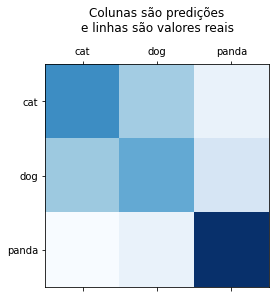

In [47]:
#utilizei do mesmo jeito que foi feito no meu projeto 4 
from sklearn.metrics import confusion_matrix, classification_report
quant = [0, 1 ,2]
cm_plot_labels = ['cat', 'dog', 'panda']
print(classification_report(y_true = test_batches.classes, y_pred = np.argmax(predictions, axis=-1)))

conf_mx = confusion_matrix(y_true=test_batches.classes, y_pred= np.argmax(predictions, axis=-1))
plt.matshow(conf_mx, cmap= plt.cm.Blues) 
plt.xticks(quant, cm_plot_labels)
plt.yticks(quant, cm_plot_labels)
plt.title('Colunas são predições\ne linhas são valores reais\n')
plt.show()

## Fazendo matriz de confusão dos resultados e predições do modelo adaptado de transfer learning 

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       150
           1       0.54      0.48      0.51       150
           2       0.78      0.90      0.84       150

    accuracy                           0.66       450
   macro avg       0.64      0.66      0.65       450
weighted avg       0.64      0.66      0.65       450



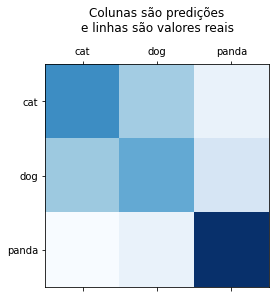

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
quant = [0, 1 ,2]
cm_plot_labels = ['cat', 'dog', 'panda'] 
print(classification_report(test_batches.classes, np.argmax(predictions_transfer, axis=-1)))

conf_mx = confusion_matrix(y_true=test_batches.labels, y_pred= np.argmax(predictions_transfer, axis=-1))
plt.matshow(conf_mx, cmap= plt.cm.Blues) 
plt.xticks(quant, cm_plot_labels)
plt.yticks(quant, cm_plot_labels)
plt.title('Colunas são predições\ne linhas são valores reais\n')
plt.show()